[INFO] STD_DIR: ../outputs/summary/paperset_std_rate_2025-12-04_1026
[INFO] ACC_DIR: ../outputs/summary/paperset_accurate_rate_2025-12-04_1026
[INFO] OUTPUTS_ROOT: ../outputs
[INFO] df_std_all: (331, 26)
[INFO] df_acc_all: (331, 26)
[INFO] winners_std métodos: ['as-snn', 'ewc', 'rehearsal', 'sa-snn', 'sca-snn']
[INFO] winners_acc métodos: ['as-snn', 'ewc', 'rehearsal', 'sa-snn', 'sca-snn']


,preset,method_base,run_dir,c1_final_mae,c2_final_mae,avg_forget_rel,emissions_kg,score_comp
8,accurate,as-snn,continual_accurate_as-snn_gr_0.5_lam_0.18_ema_...,0.163134,0.137824,0.178415,0.126926,0.137297
1,std,as-snn,continual_std_as-snn_gr_0.5_lam_0.2_ema_0.9_l1...,0.150925,0.150619,0.132559,0.061587,0.068938
9,accurate,ewc,continual_accurate_ewc_lam_3e+06_accurate_ewc_...,0.170710,0.156866,0.225856,0.127054,0.527628
4,std,ewc,continual_std_ewc_lam_3e+06_std_ewc_l3e6_fb200...,0.177213,0.170263,0.234944,0.062440,0.332237
7,accurate,rehearsal,continual_accurate_rehearsal_buf_3000_rr_15_ac...,0.154645,0.141121,0.132458,0.002927,0.106168
2,std,rehearsal,continual_std_rehearsal_buf_3000_rr_30_std_reh...,0.141517,0.159508,0.074368,0.062230,0.071395
6,accurate,sa-snn,continual_accurate_sa-snn_accurate_sa_k013_vt1...,0.161984,0.136120,0.175901,0.133361,0.105519
3,std,sa-snn,continual_std_sa-snn_tune_sa_k013_vt120_rate_m...,0.144487,0.154740,0.111237,0.063431,0.076388
5,accurate,sca-snn,continual_accurate_sca-snn_bins50_beta0.5_bias...,0.150626,0.137907,0.134400,0.228165,0.058412
0,std,sca-snn,continual_std_sca-snn_bins50_beta0.5_bias0_tem...,0.149560,0.154640,0.093250,0.051350,0.055552


[OK] tabla_winners_por_metodo_std_acc.csv → ../outputs/summary/tabla_winners_por_metodo_std_acc.csv


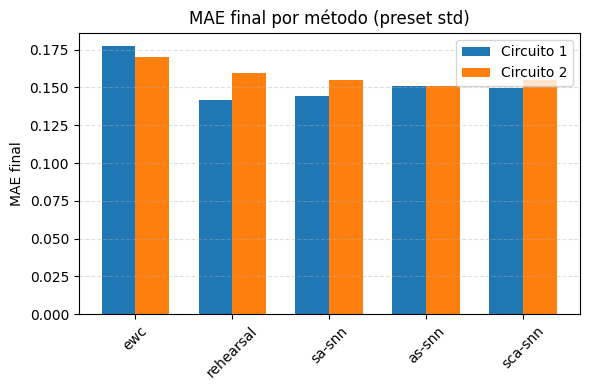

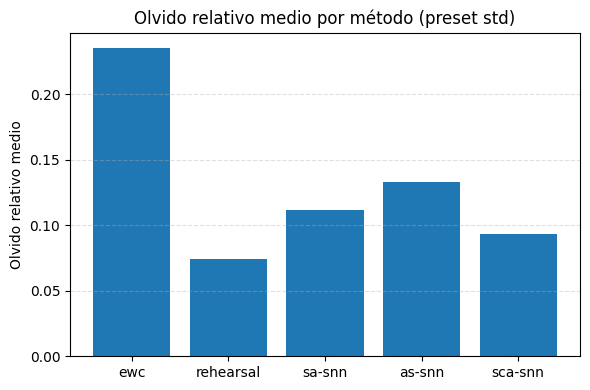

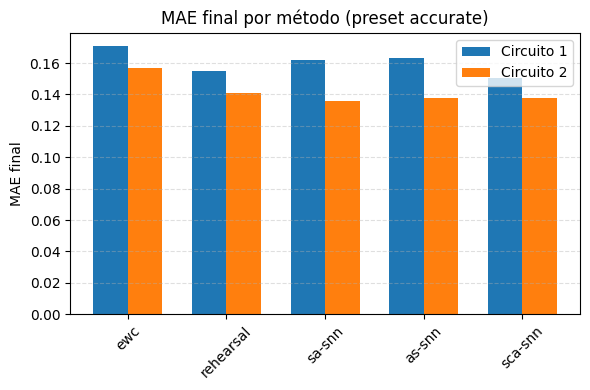

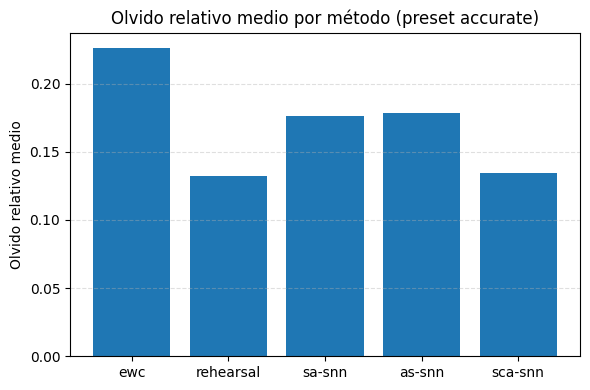

[INFO] Pareto: usando selection_table (comparables)


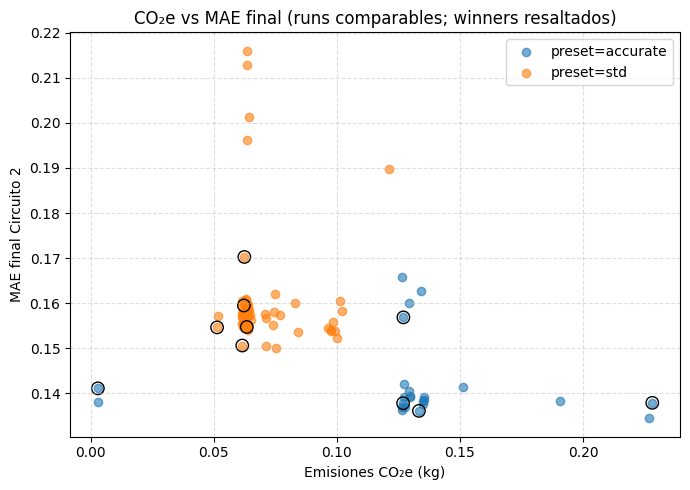

[INFO] accurate / ewc → continual_accurate_ewc_lam_3e+06_accurate_ewc_l3e6_fb200_s87_rate_model-PilotNetSNN_66x200_gray_seed_87
[INFO] accurate / sca-snn → continual_accurate_sca-snn_bins50_beta0.5_bias0_temp0.5_ab24_flat1_accurate_sca_b050_flat1_s87_rate_model-PilotNetSNN_66x200_gray_seed_87
[INFO] accurate / rehearsal → continual_accurate_rehearsal_buf_3000_rr_15_accurate_reh_buf3000_r015_s777_rate_model-PilotNetSNN_66x200_gray_seed_777


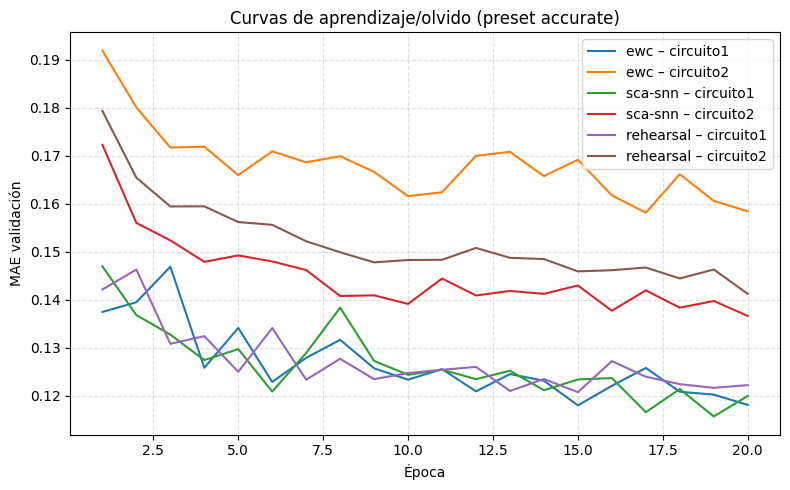

[INFO] std / ewc → continual_std_ewc_lam_3e+06_std_ewc_l3e6_fb200_s42_rate_model-PilotNetSNN_66x200_gray_seed_42
[INFO] std / sca-snn → continual_std_sca-snn_bins50_beta0.5_bias0_temp0.5_ab24_flat0_std_sca_f6_b50_beta050_bias0_t050_ab24_rate_model-PilotNetSNN_66x200_gray_seed_42


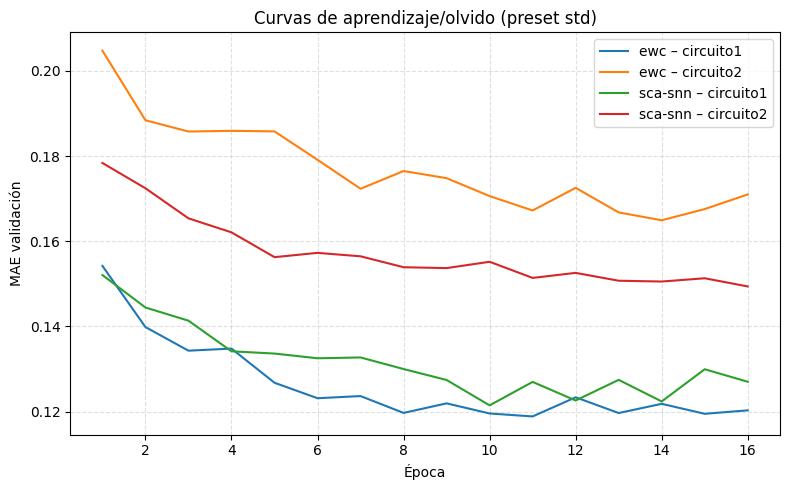

### Candidatos ordenados por c2_final_mae:


,preset,method_base,run_dir,c1_final_mae,c2_final_mae,avg_forget_rel,emissions_kg
1,std,as-snn,continual_std_as-snn_gr_0.5_lam_0.2_ema_0.9_l1...,0.150925,0.150619,0.132559,0.061587



=== Run elegido para el simulador ===
preset                 std
method_base         as-snn
c2_final_mae      0.150619
avg_forget_rel    0.132559
emissions_kg      0.061587
Name: 1, dtype: object
RUN_DIR relativo: continual_std_as-snn_gr_0.5_lam_0.2_ema_0.9_l1_scale_on_std_as_input_gr050_lam0p20_scaling_on_s07_rate_model-PilotNetSNN_66x200_gray_seed_42
RUN_DIR absoluto: /home/cesar/proyectos/TFM_SNN/outputs/continual_std_as-snn_gr_0.5_lam_0.2_ema_0.9_l1_scale_on_std_as_input_gr050_lam0p20_scaling_on_s07_rate_model-PilotNetSNN_66x200_gray_seed_42

[OK] Guardado manifest: /home/cesar/proyectos/TFM_SNN/outputs/best_for_sim.json
[INFO] preset_for_sim='std' method_for_sim='as-snn'


In [ ]:
# %% [markdown]
"""
# Análisis de resultados TFM SNN + CL

Este notebook construye las tablas y figuras clave para la memoria a partir de
los resúmenes generados por `05_RESULTS.ipynb`.

Flujo asumido:

1. Has ejecutado `05_RESULTS.ipynb` para el preset `std`
   → carpeta `paperset_std_rate_YYYY-MM-DD_HHMM`.
2. Has ejecutado `05_RESULTS.ipynb` para el preset `accurate`
   → carpeta `paperset_accurate_rate_YYYY-MM-DD_HHMM`.

Este notebook **no recalcula nada**: solo lee de esas carpetas y, cuando
necesita curvas por época, baja a los `run_dir` originales.
"""

# %%
from pathlib import Path
from typing import Optional, Dict, List

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------------------------------
# 0. CONFIGURA AQUÍ LAS CARPETAS SUMMARY QUE QUIERES USAR
# ----------------------------------------------------------------------

BASE_SUMMARY = Path("../outputs/summary")

STD_DIR = BASE_SUMMARY / "paperset_std_rate_2025-12-04_1026"
ACC_DIR = BASE_SUMMARY / "paperset_accurate_rate_2025-12-04_1026"
# Ajusta los nombres si has vuelto a ejecutar 05_RESULTS.ipynb con otra fecha/hora.

# OUT raíz de runs individuales (se deduce de STD_DIR → .../outputs/summary/...)
OUTPUTS_ROOT = STD_DIR.parent.parent  # ../outputs

print("[INFO] STD_DIR:", STD_DIR)
print("[INFO] ACC_DIR:", ACC_DIR)
print("[INFO] OUTPUTS_ROOT:", OUTPUTS_ROOT)

# ----------------------------------------------------------------------
# 1. Helpers básicos
# ----------------------------------------------------------------------

def load_csv(path: Path) -> pd.DataFrame:
    if not path.exists():
        raise FileNotFoundError(f"No existe: {path}")
    return pd.read_csv(path)

def ensure_mae_aliases(df: pd.DataFrame) -> pd.DataFrame:
    """
    Crea alias c1_final_mae/c2_final_mae si solo existen las columnas
    circuitoX_final_mae.
    """
    df = df.copy()
    if "c1_final_mae" not in df.columns and "circuito1_final_mae" in df.columns:
        df["c1_final_mae"] = df["circuito1_final_mae"]
    if "c2_final_mae" not in df.columns and "circuito2_final_mae" in df.columns:
        df["c2_final_mae"] = df["circuito2_final_mae"]
    return df


def canonical_method(m: str) -> str:
    s = (m or "").lower()
    if s.startswith("ewc"):
        return "ewc"
    if s.startswith("as-snn"):
        return "as-snn"
    if s.startswith("sa-snn"):
        return "sa-snn"
    if s.startswith("sca-snn"):
        return "sca-snn"
    if s.startswith("rehearsal"):
        return "rehearsal"
    if s.startswith("naive"):
        return "naive"
    if s == "std":
        return "std"
    return s or "unknown"


# ----------------------------------------------------------------------
# 2. Carga de resúmenes (std + accurate)
# ----------------------------------------------------------------------

# Ficheros principales de cada summary
STD_RESULTS = STD_DIR / "results_table_fromdisk.csv"
ACC_RESULTS = ACC_DIR / "results_table_fromdisk.csv"

STD_WINNERS = STD_DIR / "winners_per_methodbase.csv"
ACC_WINNERS = ACC_DIR / "winners_per_methodbase.csv"

STD_SELECTION = STD_DIR / "selection_table.csv"
ACC_SELECTION = ACC_DIR / "selection_table.csv"

STD_PARETO = STD_DIR / "pareto.csv"
ACC_PARETO = ACC_DIR / "pareto.csv"

df_std_all = ensure_mae_aliases(load_csv(STD_RESULTS))
df_acc_all = ensure_mae_aliases(load_csv(ACC_RESULTS))

print("[INFO] df_std_all:", df_std_all.shape)
print("[INFO] df_acc_all:", df_acc_all.shape)

# winners_per_methodbase ya están filtrados por comparabilidad (vienen de selection_table)
winners_std = ensure_mae_aliases(load_csv(STD_WINNERS))
winners_acc = ensure_mae_aliases(load_csv(ACC_WINNERS))

# Aseguramos method_base normalizada (por si acaso)
for df_w in (winners_std, winners_acc):
    if "method_base" in df_w.columns:
        df_w["method_base"] = df_w["method_base"].astype(str).apply(canonical_method)
    else:
        df_w["method_base"] = df_w["method"].astype(str).apply(canonical_method)

print("[INFO] winners_std métodos:", sorted(winners_std["method_base"].unique()))
print("[INFO] winners_acc métodos:", sorted(winners_acc["method_base"].unique()))

# ----------------------------------------------------------------------
# 3. Tabla resumen: ganadores por método (std + accurate)
# ----------------------------------------------------------------------

cols_base = [
    "preset",
    "method_base",
    "run_dir",
    "c1_final_mae",
    "c2_final_mae",
    "avg_forget_rel",
    "emissions_kg",
]

if "score_comp" in winners_std.columns or "score_comp" in winners_acc.columns:
    cols_base.append("score_comp")

winners_all = pd.concat([winners_std, winners_acc], ignore_index=True)

# Normaliza preset (por si viene vacío en winners_per_methodbase)
if "preset" not in winners_all.columns or winners_all["preset"].isna().all():
    # Los de STD_DIR → 'std'; los de ACC_DIR → 'accurate'
    # Nos apoyamos en que STD_WINNERS y ACC_WINNERS se concatenan en ese orden
    n_std = len(winners_std)
    winners_all["preset"] = ["std"] * n_std + ["accurate"] * len(winners_acc)

cols_present = [c for c in cols_base if c in winners_all.columns]
winners_compact = winners_all[cols_present].copy()

winners_compact = winners_compact.sort_values(["method_base", "preset"])
display(winners_compact)

# Export para usar desde LaTeX o revisar con calma
out_tabla = STD_DIR.parent / "tabla_winners_por_metodo_std_acc.csv"
winners_compact.to_csv(out_tabla, index=False)
print("[OK] tabla_winners_por_metodo_std_acc.csv →", out_tabla)

# ----------------------------------------------------------------------
# 4. Figuras de barras (MAE y olvido) para std y accurate
# ----------------------------------------------------------------------

def plot_mae_bars(winners_df: pd.DataFrame, preset_name: str):
    w = winners_df[winners_df["preset"] == preset_name].copy()
    if w.empty:
        print(f"[WARN] No hay winners para preset={preset_name}")
        return

    # Orden de métodos incluyendo rehearsal
    methods_order = ["std", "ewc", "rehearsal", "sa-snn", "as-snn", "sca-snn"]
    methods_present = [m for m in methods_order if m in w["method_base"].unique()]

    w = w.set_index("method_base").loc[methods_present].reset_index()

    plt.figure(figsize=(6, 4))
    x = range(len(w))
    width = 0.35

    plt.bar([i - width / 2 for i in x], w["c1_final_mae"], width=width, label="Circuito 1")
    plt.bar([i + width / 2 for i in x], w["c2_final_mae"], width=width, label="Circuito 2")

    plt.xticks(list(x), w["method_base"], rotation=45)
    plt.ylabel("MAE final")
    plt.title(f"MAE final por método (preset {preset_name})")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()


def plot_forget_bars(winners_df: pd.DataFrame, preset_name: str):
    w = winners_df[winners_df["preset"] == preset_name].copy()
    if w.empty:
        print(f"[WARN] No hay winners para preset={preset_name}")
        return

    methods_order = ["std", "ewc", "rehearsal", "sa-snn", "as-snn", "sca-snn"]
    methods_present = [m for m in methods_order if m in w["method_base"].unique()]
    w = w.set_index("method_base").loc[methods_present].reset_index()

    plt.figure(figsize=(6, 4))
    plt.bar(w["method_base"], w["avg_forget_rel"])
    plt.ylabel("Olvido relativo medio")
    plt.title(f"Olvido relativo medio por método (preset {preset_name})")
    plt.grid(axis="y", linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()


# --- Figuras para std ---
plot_mae_bars(winners_compact, "std")
plot_forget_bars(winners_compact, "std")

# --- Figuras para accurate (incluye rehearsal) ---
plot_mae_bars(winners_compact, "accurate")
plot_forget_bars(winners_compact, "accurate")

# ----------------------------------------------------------------------
# 5. Diagrama de Pareto CO₂e vs MAE (comparando presets)
# ----------------------------------------------------------------------

# Usamos selection_table (comparables) si existe; si no, results_table_all
try:
    df_std_sel = ensure_mae_aliases(load_csv(STD_SELECTION))
    df_acc_sel = ensure_mae_aliases(load_csv(ACC_SELECTION))
    df_all = pd.concat([df_std_sel, df_acc_sel], ignore_index=True)
    print("[INFO] Pareto: usando selection_table (comparables)")
except Exception as e:
    print("[WARN] No se pudo leer selection_table, uso results_table_fromdisk:", e)
    df_all = pd.concat([df_std_all, df_acc_all], ignore_index=True)

for df in (df_all,):
    if "method_base" in df.columns:
        df["method_base"] = df["method_base"].astype(str).apply(canonical_method)

needed_cols = ["preset", "method_base", "emissions_kg", "c2_final_mae"]
for col in needed_cols:
    if col not in df_all.columns:
        raise ValueError(f"Falta columna {col} en df_all")

plt.figure(figsize=(7, 5))
for preset in sorted(df_all["preset"].unique()):
    sub = df_all[df_all["preset"] == preset]
    plt.scatter(
        sub["emissions_kg"],
        sub["c2_final_mae"],
        alpha=0.6,
        label=f"preset={preset}",
    )

# Resaltamos solo los winners (std + accurate)
for _, row in winners_compact.iterrows():
    plt.scatter(
        row["emissions_kg"],
        row["c2_final_mae"],
        s=80,
        facecolors="none",
        edgecolors="k",
    )

plt.xlabel("Emisiones CO₂e (kg)")
plt.ylabel("MAE final Circuito 2")
plt.title("CO₂e vs MAE final (runs comparables; winners resaltados)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------
# 6. Curvas por época (loss_curves.csv en task_1/2)
# ----------------------------------------------------------------------

def find_loss_curves_for_run(run_dir_rel: str) -> Dict[str, Optional[pd.DataFrame]]:
    """
    run_dir_rel viene de winners_compact['run_dir'], relativo a OUTPUTS_ROOT.
    Devuelve:
      {
        "circuito1": df_loss_curves_o_None,
        "circuito2": df_loss_curves_o_None,
      }
    """
    base = OUTPUTS_ROOT / run_dir_rel
    out = {}
    for task_idx, task_name in [(1, "circuito1"), (2, "circuito2")]:
        p = base / f"task_{task_idx}_{task_name}" / "loss_curves.csv"
        if p.exists():
            try:
                out[task_name] = pd.read_csv(p)
            except Exception:
                out[task_name] = None
        else:
            out[task_name] = None
    return out


def plot_learning_curves(
    winners_df: pd.DataFrame,
    preset_name: str,
    methods_to_compare: List[str],
):
    """
    Dibuja curvas val_mae por época para un conjunto de methods_to_compare
    usando los runs 'winners' del preset indicado.
    """
    w = winners_df[winners_df["preset"] == preset_name].copy()
    if w.empty:
        print(f"[WARN] No hay winners para preset={preset_name}")
        return

    w = w.copy()
    if "method_base" in w.columns:
        w["method_base"] = w["method_base"].astype(str).apply(canonical_method)

    w = w.set_index("method_base")

    plt.figure(figsize=(8, 5))
    algo_ploteado = False

    for mb in methods_to_compare:
        if mb not in w.index:
            print(f"[WARN] Método {mb} no presente en winners del preset {preset_name}, se omite")
            continue

        run_dir = w.loc[mb, "run_dir"]
        lc = find_loss_curves_for_run(run_dir)
        print(f"[INFO] {preset_name} / {mb} → {run_dir}")

        for task_name, df_loss in lc.items():
            if df_loss is None or df_loss.empty:
                print(f"  [WARN] Sin loss_curves para {task_name}")
                continue

            # Detectamos columna de MAE
            mae_col = None
            for cand in ["val_mae", "mae_val", "val_mae_epoch", "mae"]:
                if cand in df_loss.columns:
                    mae_col = cand
                    break
            if mae_col is None:
                print(f"  [WARN] Sin columna MAE reconocible en {task_name}, columnas: {list(df_loss.columns)}")
                continue

            if "epoch" not in df_loss.columns:
                print(f"  [WARN] Sin columna epoch en {task_name}, columnas: {list(df_loss.columns)}")
                continue

            label = f"{mb} – {task_name}"
            plt.plot(df_loss["epoch"], df_loss[mae_col], label=label)
            algo_ploteado = True

    if algo_ploteado:
        plt.xlabel("Época")
        plt.ylabel("MAE validación")
        plt.title(f"Curvas de aprendizaje/olvido (preset {preset_name})")
        plt.legend()
        plt.grid(True, linestyle="--", alpha=0.4)
        plt.tight_layout()
        plt.show()
    else:
        print("[WARN] No se ha podido generar la figura (faltan loss_curves válidos).")


# Ejemplo: comparar EWC, SCA-SNN y Rehearsal en preset accurate
methods_to_compare_acc = ["ewc", "sca-snn", "rehearsal"]
plot_learning_curves(winners_compact, preset_name="accurate", methods_to_compare=methods_to_compare_acc)

# Ejemplo: comparar EWC y SCA-SNN en preset std (si los tienes)
methods_to_compare_std = ["ewc", "sca-snn"]
plot_learning_curves(winners_compact, preset_name="std", methods_to_compare=methods_to_compare_std)


# %% [markdown]
"""
## 6. Seleccionar el mejor run para el simulador

Elegimos el mejor run global según `c2_final_mae` (MAE final Circuito 2).
Guardamos un manifest `best_for_sim.json` en la raíz de `outputs`
para que lo pueda consumir un script de inferencia/simulador.
"""

# %%
from pathlib import Path
import json
import numpy as np

# --- CONFIGURACIÓN: qué preset y qué método quieres mandar al simulador ---
# preset con el que se entrenó el run a probar
PRESET_FOR_SIM = "std"   # "std" o "accurate"

# método base a probar:
#   "std", "ewc", "rehearsal", "sa-snn", "as-snn", "sca-snn"
# Si lo dejas a None → mejor global (todos los métodos y presets disponibles)
METHOD_FOR_SIM = "sca-snn"         # p.ej. "ewc" o "sa-snn"

# Raíz de outputs (ajusta si hace falta)
OUT = Path("/home/cesar/proyectos/TFM_SNN/outputs").resolve()

# Copia y alias de columnas
df_best = winners_compact.copy()
if "c2_final_mae" not in df_best.columns and "circuito2_final_mae" in df_best.columns:
    df_best["c2_final_mae"] = df_best["circuito2_final_mae"]

# Normaliza method_base por si acaso
if "method_base" in df_best.columns:
    df_best["method_base"] = df_best["method_base"].astype(str).apply(canonical_method)
else:
    df_best["method_base"] = df_best["method"].astype(str).apply(canonical_method)

# --- 1) Filtro por preset ----------------------------------------------------
if PRESET_FOR_SIM is not None:
    df_best = df_best[df_best["preset"] == PRESET_FOR_SIM]

if df_best.empty:
    raise RuntimeError(f"No hay runs en winners_compact para preset={PRESET_FOR_SIM!r}")

# --- 2) Filtro por método (si se pide uno concreto) -------------------------
if METHOD_FOR_SIM is not None:
    mb = METHOD_FOR_SIM.lower()
    df_best = df_best[df_best["method_base"] == mb]
    if df_best.empty:
        raise RuntimeError(
            f"No hay runs para method_base={mb!r} en preset={PRESET_FOR_SIM!r}. "
            f"Revisa winners_compact['method_base']."
        )

# --- 3) Mostrar candidatos (Top-5 por MAE en circuito 2) --------------------
cols_show = [c for c in [
    "preset", "method_base", "method", "run_dir",
    "c1_final_mae", "c2_final_mae", "avg_forget_rel", "emissions_kg"
] if c in df_best.columns]

print("### Candidatos ordenados por c2_final_mae:")
display(df_best.sort_values("c2_final_mae")[cols_show].head(5))

# --- 4) Elegir el mejor según c2_final_mae ----------------------------------
best_row = df_best.sort_values("c2_final_mae").iloc[0]

best_run_dir_rel = str(best_row["run_dir"])
best_run_dir_abs = str((OUT / best_run_dir_rel).resolve())

print("\n=== Run elegido para el simulador ===")
print(best_row[[
    "preset", "method_base",
    *[c for c in ["method","seed","c2_final_mae","avg_forget_rel","emissions_kg"] if c in best_row.index]
]])
print("RUN_DIR relativo:", best_run_dir_rel)
print("RUN_DIR absoluto:", best_run_dir_abs)

# --- 5) Escribir manifest para 99_SIM_INTEGRATION.ipynb ---------------------
best_manifest = {
    "run_dir": best_run_dir_rel,
    "run_dir_abs": best_run_dir_abs,
    "preset": best_row["preset"],
    "method_base": best_row["method_base"],
    "method": best_row.get("method", best_row["method_base"]),
    "seed": (
        None
        if "seed" not in best_row.index
        or (isinstance(best_row["seed"], float) and np.isnan(best_row["seed"]))
        else float(best_row["seed"])
    ),
    "c1_final_mae": float(best_row["c1_final_mae"]),
    "c2_final_mae": float(best_row["c2_final_mae"]),
    "avg_forget_rel": float(best_row["avg_forget_rel"]),
    "emissions_kg": float(best_row["emissions_kg"]),
}

MANIFEST_PATH = OUT / "best_for_sim.json"
MANIFEST_PATH.write_text(json.dumps(best_manifest, indent=2), encoding="utf-8")
print("\n[OK] Guardado manifest:", MANIFEST_PATH)
print(f"[INFO] preset_for_sim={PRESET_FOR_SIM!r} method_for_sim={METHOD_FOR_SIM!r}")

